폐암 수술 환자의 생존유무 예측하기 (1: 생존, 0: 사망)

데이터 준비하기

In [1]:
import numpy
import pandas
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense

# 랜덤 시드 고정시키기
numpy.random.seed(5)

In [2]:
dataset = numpy.loadtxt('/content/ThoraricSurgery.csv', delimiter = ',')  # 값이 모두 숫자이기때문에 굳이 판다스말고 넘파이로 가져와본다
dataset.shape

(470, 18)

데이터셋 생성하기 - 입력(속성값 17개: 문제집), 출력(판정결과 1개: 정답지) 변수로 분리

In [3]:
# 학습 데이터 ...700개 and 8번수 가져오기
X_train = dataset[:420, 0:17]
y_train = dataset[:420, 17]

# 테스트 데이터 68개 and 1변수 가져오기
X_test = dataset[420:, 0:17]
y_test = dataset[420:, 17]

In [4]:
X_train.shape

(420, 17)

In [15]:
y_train.shape

(420,)

모델 구성하기

In [5]:
model = Sequential()
model.add(Dense(30, input_dim = 17, activation = 'relu'))
model.add(Dense(20, activation = 'relu'))
model.add(Dense(10, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

모델 설정하기

In [6]:
model.compile(loss = 'binary_crossentropy',
              optimizer = 'adam',
              metrics = ['accuracy']) # == 'acc'

모델 학습시키기

In [7]:
history = model.fit(X_train, y_train,
                    epochs = 100,
                    batch_size = 64)

Epoch 1/100
7/7 [==============================] - 14s 3ms/step - loss: 1.5974 - accuracy: 0.8534
Epoch 2/100
7/7 [==============================] - 0s 3ms/step - loss: 0.8215 - accuracy: 0.7560
Epoch 3/100
7/7 [==============================] - 0s 3ms/step - loss: 0.6840 - accuracy: 0.8358
Epoch 4/100
7/7 [==============================] - 0s 3ms/step - loss: 0.4717 - accuracy: 0.8587
Epoch 5/100
7/7 [==============================] - 0s 4ms/step - loss: 0.4765 - accuracy: 0.8391
Epoch 6/100
7/7 [==============================] - 0s 3ms/step - loss: 0.4226 - accuracy: 0.8696
Epoch 7/100
7/7 [==============================] - 0s 3ms/step - loss: 0.4123 - accuracy: 0.8721
Epoch 8/100
7/7 [==============================] - 0s 4ms/step - loss: 0.3982 - accuracy: 0.8702
Epoch 9/100
7/7 [==============================] - 0s 2ms/step - loss: 0.3984 - accuracy: 0.8655
Epoch 10/100
7/7 [==============================] - 0s 2ms/step - loss: 0.4186 - accuracy: 0.8527
Epoch 11/100
7/7 [==========

학습결과 그려보기

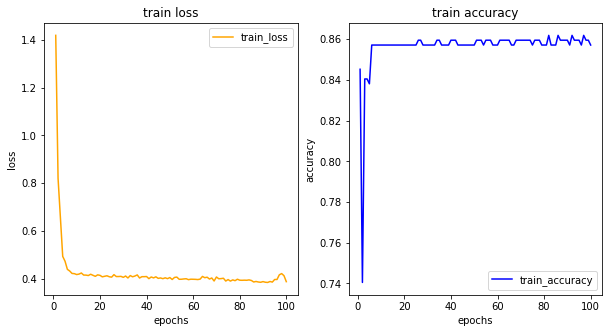

In [8]:
import matplotlib.pyplot as plt

his_dict = history.history
loss = his_dict['loss']

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize = (10, 5))

# 훈련 및 검증 손실 그리기
ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, color = 'orange', label = 'train_loss')
ax1.set_title('train loss')
ax1.set_xlabel('epochs')
ax1.set_ylabel('loss')
ax1.legend()

acc = his_dict['accuracy']

# 훈련 및 검증 정확도 그리기
ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, acc, color = 'blue', label = 'train_accuracy')
ax2.set_title('train accuracy')
ax2.set_xlabel('epochs')
ax2.set_ylabel('accuracy')
ax2.legend()

plt.show()

모델 평가하기

In [9]:
scores = model.evaluate(X_test, y_test)
print("%s: %.2f%%" %(model.metrics_names[1], scores[1]*100))  # scores[1]엔 손실점수가 있어서...

2/2 [==============================] - 1s 7ms/step - loss: 0.5098 - accuracy: 0.8000
accuracy: 80.00%


모델 성능평가

In [10]:
# ROC
def plot_auc_roc(model):
    probs = model.predict_classes(X_test)
    fpr, tpr, threshold = metrics.roc_curve(y_test, probs)
    roc_auc = metrics.auc(fpr, tpr)

    # method I: plt
    import matplotlib.pyplot as plt
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

In [11]:
# 모델 예측하기
result = model.predict_classes(X_test)  # classes는 0.5같은 기준점이 애매해서 막 쓰기엔 위험하다

/usr/local/lib/python3.7/dist-packages/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [12]:
from sklearn import metrics
report = metrics.classification_report(y_test, result)
print(report)

              precision    recall  f1-score   support

         0.0       0.80      1.00      0.89        40
         1.0       0.00      0.00      0.00        10

    accuracy                           0.80        50
   macro avg       0.40      0.50      0.44        50
weighted avg       0.64      0.80      0.71        50



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [13]:
print(metrics.precision_score(y_test, result))
print(metrics.recall_score(y_test, result))

0.0
0.0


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


/usr/local/lib/python3.7/dist-packages/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


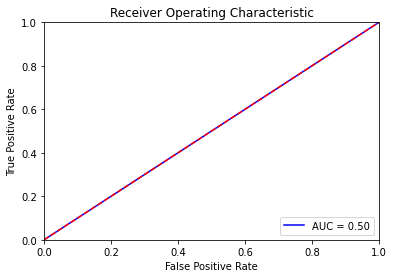

In [14]:
plot_auc_roc(model)

테스트셋으로 돌려본 결과 모두 0.5 미만으로 생존(1)에 대한 값이 거의 없어서 1에 대한 recall 값들이 나오지 않았다.

이 모델을 쓸 수 없다.